<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 커널 기반 분류

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [0]:
# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

In [0]:
# Create datasets
X, Y = make_circles(n_samples=nb_samples, noise=0.1)

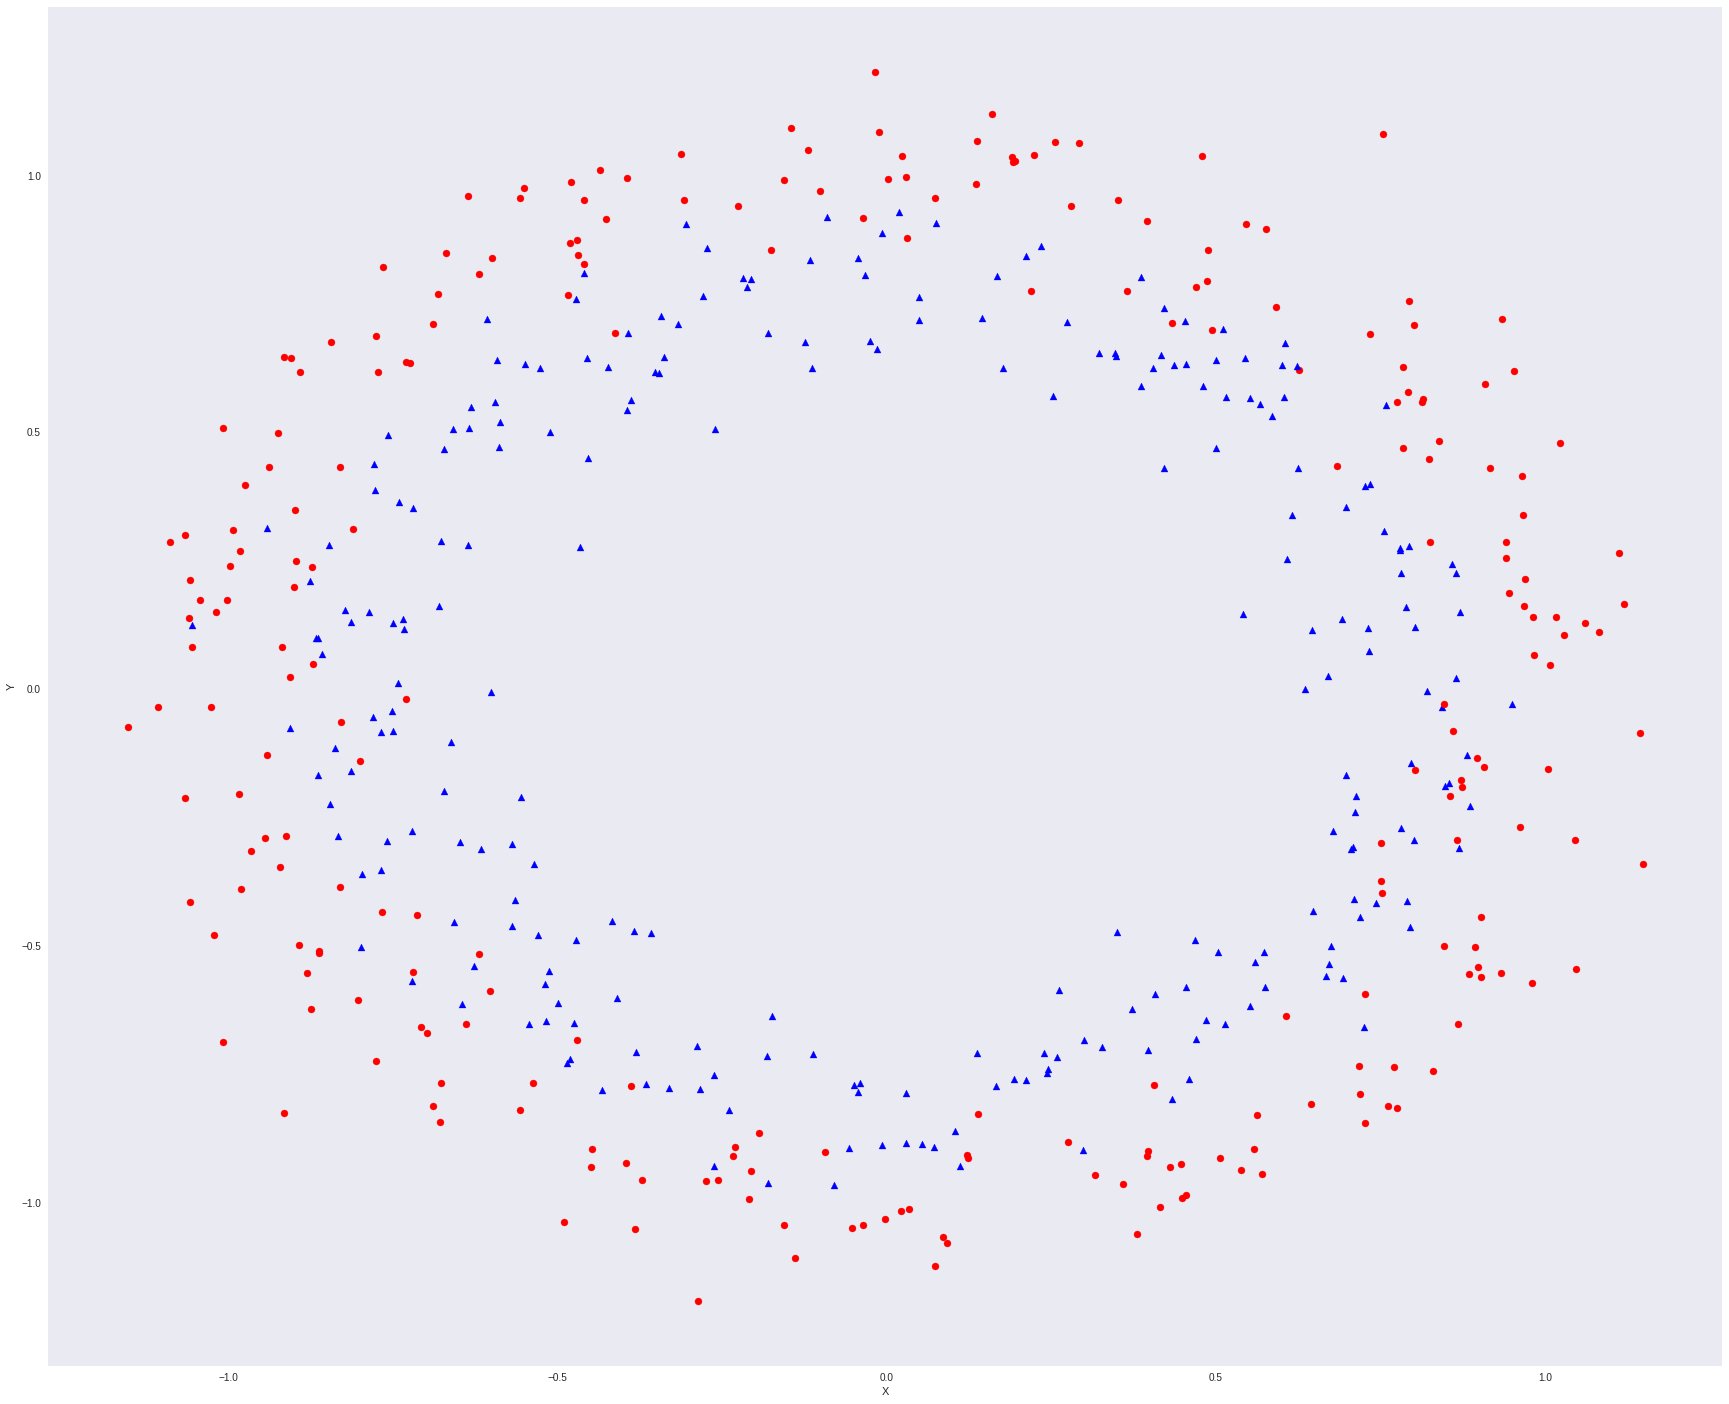

In [36]:
# Show dataset
show_dataset(X, Y)

In [0]:
# Define a param grid
param_grid = [
    {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]
    }
]

In [39]:
# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
print(gs.best_estimator_)
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Kernel SVM score: 0.882
